## Starting the attempt at a descriptive analysis

### Importing the libs

In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import re

%matplotlib inline

### Reading the data

In [257]:
fidcs_info = pd.read_csv('IM_230626_semNP.csv')
assignors_info = pd.read_csv('IM_Cedente_230626_semNP.csv')
classes_info = pd.read_csv('IM_Classes_230626_semNP.csv')

C:\Users\Inteli\AppData\Local\Temp\ipykernel_12480\1102511081.py:1: DtypeWarning: Columns (12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  fidcs_info = pd.read_csv('IM_230626_semNP.csv')


### Data visualization

In [258]:
fidcs_info.columns.values

array(['ID_Participante', 'ID_Documento', 'SK_Documento', 'CNPJ',
       'Data_Competencia', 'Data_Entrega', 'CNPJ_Administrador',
       'Nome_Administrador', 'Forma_Condominio', 'Fundo_Exclusivo',
       'Cotistas_Vinculados_Interesse', 'Prazo_Conversao_Cotas',
       'Tipo_Prazo_Conversao_Cotas', 'Prazo_Pagamento_Resgate',
       'Tipo_Prazo_Pagamento_Resgate', 'Ativo', 'Ativo_Disponibilidades',
       'Ativo_Carteira', 'Ativo_Direitos_Aquisicao',
       'Ativo_Direitos_Aquisicao_Creditos_Vencer_Adimplentes',
       'Ativo_Direitos_Aquisicao_Creditos_Vencer_Inadimplentes',
       'Ativo_Direitos_Aquisicao_Parcelas_Inadimplentes',
       'Ativo_Direitos_Aquisicao_Creditos_Inadimplentes',
       'Ativo_Direitos_Aquisicao_Creditos_Performar',
       'Ativo_Direitos_Aquisicao_Creditos_Vencidos_Pendentes',
       'Ativo_Direitos_Aquisicao_Creditos_Empresas_Recuperacao',
       'Ativo_Direitos_Aquisicao_Creditos_Receitas_Publicas',
       'Ativo_Direitos_Aquisicao_Creditos_Acoes_Judiciais

In [259]:
assignors_info.columns.values

array(['SK_Documento', 'Item', 'Sequencial', 'CPF_CNPJ_Cedente',
       'Participacao_Percentual'], dtype=object)

In [260]:
classes_info.columns.values

array(['SK_Documento', 'Classe_Serie', 'Numero_Cotistas',
       'Quantidade_Cotas', 'Valor_Cota', 'Rentabilidade',
       'Valor_Total_Captado', 'Quantidade_Cotas_Emitidas',
       'Valor_Total_Resgates', 'Quantidade_Cotas_Resgatadas',
       'Valor_A_Pagar', 'Quantidade_Cotas_A_Resgatar',
       'Valor_Amortizado_Cota', 'Valor_Total_Amortizacao',
       'Desempenho_Esperado', 'Desempenho_Realizado'], dtype=object)

In [261]:
# numerical columns of fidcs_info
fidcs_numerical_columns = fidcs_info.select_dtypes(include=['int', 'float']).columns

# categorical columns of fidcs_info
fidcs_categorical_columns = fidcs_info.select_dtypes(include=['object']).columns

In [262]:
fidcs_numerical_columns

Index(['ID_Participante', 'ID_Documento', 'CNPJ', 'CNPJ_Administrador',
       'Prazo_Conversao_Cotas', 'Prazo_Pagamento_Resgate', 'Ativo',
       'Ativo_Disponibilidades', 'Ativo_Carteira', 'Ativo_Direitos_Aquisicao',
       ...
       'Numero_Cotistas_Subordinada_Outros', 'Liquidez_Imediata',
       'Liquidez_Ate_30_Dias', 'Liquidez_Ate_60_Dias', 'Liquidez_Ate_90_Dias',
       'Liquidez_Ate_180_Dias', 'Liquidez_Ate_360_Dias',
       'Liquidez_Acima_360_Dias', 'Garantias_Valor_Total',
       'Garantias_Percentual'],
      dtype='object', length=308)

In [263]:
fidcs_categorical_columns

Index(['SK_Documento', 'Data_Competencia', 'Data_Entrega',
       'Nome_Administrador', 'Forma_Condominio', 'Fundo_Exclusivo',
       'Cotistas_Vinculados_Interesse', 'Tipo_Prazo_Conversao_Cotas',
       'Tipo_Prazo_Pagamento_Resgate',
       'Taxas_Direitos_Aquisicao_Desconto_Compra_Media_Ponderada',
       'Taxas_Direitos_Aquisicao_Desconto_Compra_Maxima', 'Sistema_Origem',
       'Nome_Fundo'],
      dtype='object')

In [264]:
# numerical columns of assignors_info
assignors_numerical_columns = assignors_info.select_dtypes(include=['int', 'float']).columns

# categorical columns of assignors_info
assignors_categorical_columns = assignors_info.select_dtypes(include=['object']).columns

In [265]:
assignors_numerical_columns

Index(['Sequencial', 'CPF_CNPJ_Cedente', 'Participacao_Percentual'], dtype='object')

In [266]:
assignors_categorical_columns

Index(['SK_Documento', 'Item'], dtype='object')

In [267]:
# numerical columns of classes_info
classes_numerical_columns = classes_info.select_dtypes(include=['int', 'float']).columns

# categorical columns of classes_info
classes_categorical_columns = classes_info.select_dtypes(include=['object']).columns

In [268]:
classes_numerical_columns

Index(['Numero_Cotistas', 'Quantidade_Cotas', 'Valor_Cota', 'Rentabilidade',
       'Valor_Total_Captado', 'Quantidade_Cotas_Emitidas',
       'Valor_Total_Resgates', 'Quantidade_Cotas_Resgatadas', 'Valor_A_Pagar',
       'Quantidade_Cotas_A_Resgatar', 'Valor_Amortizado_Cota',
       'Valor_Total_Amortizacao', 'Desempenho_Esperado',
       'Desempenho_Realizado'],
      dtype='object')

In [269]:
classes_categorical_columns

Index(['SK_Documento', 'Classe_Serie'], dtype='object')

In [270]:
fidcs_info.head()

,ID_Participante,ID_Documento,SK_Documento,CNPJ,Data_Competencia,Data_Entrega,CNPJ_Administrador,Nome_Administrador,Forma_Condominio,Fundo_Exclusivo,...,Liquidez_Ate_30_Dias,Liquidez_Ate_60_Dias,Liquidez_Ate_90_Dias,Liquidez_Ate_180_Dias,Liquidez_Ate_360_Dias,Liquidez_Acima_360_Dias,Garantias_Valor_Total,Garantias_Percentual,Sistema_Origem,Nome_Fundo
0,164756,130046,FNET|130046,24331364000112,2020-11-30,2020-12-04,6.228539e+13,SINGULARE CORRETORA DE TÍTULOS E VALORES MOBIL...,FECHADO,Não,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FNET,CIPA FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS ...
1,164756,137253,FNET|137253,24331364000112,2020-12-31,2021-01-07,6.228539e+13,SINGULARE CORRETORA DE TÍTULOS E VALORES MOBIL...,FECHADO,Não,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FNET,CIPA FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS ...
2,164756,242626,FNET|242626,24331364000112,2021-11-30,2021-12-03,6.228539e+13,SINGULARE CORRETORA DE TITULOS E VALORES MOBIL...,FECHADO,Não,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FNET,CIPA FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS ...
3,164756,253264,FNET|253264,24331364000112,2021-12-31,2022-01-06,6.228539e+13,SINGULARE CORRETORA DE TITULOS E VALORES MOBIL...,FECHADO,Não,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FNET,CIPA FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS ...
4,164756,263165,FNET|263165,24331364000112,2022-01-31,2022-02-07,6.228539e+13,SINGULARE CORRETORA DE TITULOS E VALORES MOBIL...,FECHADO,Não,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FNET,CIPA FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS ...


In [271]:
assignors_info.head()

,SK_Documento,Item,Sequencial,CPF_CNPJ_Cedente,Participacao_Percentual
0,FNET|129728,Direitos Creditórios sem Aquisição Substancial...,1,1.000000e+14,0.0
1,FNET|129900,Direitos Creditórios sem Aquisição Substancial...,1,1.000000e+14,0.0
2,FNET|129903,Direitos Creditórios sem Aquisição Substancial...,1,1.000000e+14,0.0
3,FNET|129904,Direitos Creditórios sem Aquisição Substancial...,1,1.000000e+14,0.0
4,FNET|129996,Direitos Creditórios sem Aquisição Substancial...,1,1.000000e+14,0.0


### PreProcess

In [272]:
# List to store the columns that will be kept in the new DataFrame.
maintained_columns_fidcs_info = []

# Iterate through all columns in the df_informe_mensal DataFrame.
for column in fidcs_info.columns:
    # Check if the column does not end with "_Dias" and does not start with "Taxas".
    if not column.endswith("_Dias") and not column.startswith("Taxas"):
        maintained_columns_fidcs_info.append(column)

# Create a new DataFrame, df_informe_geral, containing only the columns stored in colunas_mantidas.
df_general_report_fidcs_info = fidcs_info[maintained_columns_fidcs_info]

# Assuming you have already loaded a DataFrame named "df_informe_geral".

# Sum the columns Numero_Cotistas_Senior and create a new column 'cotistas_senior'.
df_general_report_fidcs_info['cotistas_senior'] = df_general_report_fidcs_info.filter(like='Numero_Cotistas_Senior').sum(axis=1)

# Sum the columns Numero_Cotistas_Subordinada and create a new column 'cotistas_subordinados'.
df_general_report_fidcs_info['cotistas_subordinados'] = df_general_report_fidcs_info.filter(like='Numero_Cotistas_Subordinada').sum(axis=1)

# List of columns to eliminate based on a pattern.
columns_drop_fidcs_info = df_general_report_fidcs_info.columns[df_general_report_fidcs_info.columns.str.contains('([0-9_]Dias$|^Taxa)')]

# Drop the specified columns from the df_informe_geral DataFrame.
df_informe_geral = df_general_report_fidcs_info.drop(columns=columns_drop_fidcs_info)

# Display the list of columns in the modified df_informe_geral DataFrame.
df_general_report_fidcs_info.shape


C:\Users\Inteli\AppData\Local\Temp\ipykernel_12480\1286440453.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_general_report_fidcs_info['cotistas_senior'] = df_general_report_fidcs_info.filter(like='Numero_Cotistas_Senior').sum(axis=1)
C:\Users\Inteli\AppData\Local\Temp\ipykernel_12480\1286440453.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_general_report_fidcs_info['cotistas_subordinados'] = df_general_report_fidcs_info.filter(like='Numero_Cotistas_Subordinada').sum(axis=1)
C:\Users\Inte

(57301, 187)

In [273]:
remove_fidcs_info = ['ID_Participante', 'ID_Documento', 'CNPJ', 'Data_Competencia', 'Data_Entrega', 'CNPJ_Administrador', 'Nome_Administrador', 'Forma_Condominio', 'Fundo_Exclusivo', 'Cotistas_Vinculados_Interesse', 'Sistema_Origem', 'Nome_Fundo']
shareholders_type_remove_fidcs_info = ['Numero_Cotistas_Senior_Pessoa_Fisica',
 'Numero_Cotistas_Senior_Pessoa_Juridica_Nao_Financeira',
 'Numero_Cotistas_Senior_Banco_Comercial',
 'Numero_Cotistas_Senior_Corretora_Distribuidora',
 'Numero_Cotistas_Senior_Pessoa_Juridica_Financeira',
 'Numero_Cotistas_Senior_Investidor_Nao_Residente',
 'Numero_Cotistas_Senior_Entidade_Aberta_Previdencia_Complementar',
 'Numero_Cotistas_Senior_Entidade_Fechada_Previdencia_Complementar',
 'Numero_Cotistas_Senior_Regime_Proprio_Previdencia_Servidores_Publicos',
 'Numero_Cotistas_Senior_Sociedade_Seguradora',
 'Numero_Cotistas_Senior_Sociedade_Capitalizacao',
 'Numero_Cotistas_Senior_FIC_FIDC',
 'Numero_Cotistas_Senior_FII',
 'Numero_Cotistas_Senior_Outros_Fundos',
 'Numero_Cotistas_Senior_Clube_Investimento',
 'Numero_Cotistas_Senior_Outros',
 'Numero_Cotistas_Subordinada_Pessoa_Fisica',
 'Numero_Cotistas_Subordinada_Pessoa_Juridica_Nao_Financeira',
 'Numero_Cotistas_Subordinada_Banco_Comercial',
 'Numero_Cotistas_Subordinada_Corretora_Distribuidora',
 'Numero_Cotistas_Subordinada_Pessoa_Juridica_Financeira',
 'Numero_Cotistas_Subordinada_Investidor_Nao_Residente',
 'Numero_Cotistas_Subordinada_Entidade_Aberta_Previdencia_Complementar',
 'Numero_Cotistas_Subordinada_Entidade_Fechada_Previdencia_Complementar',
 'Numero_Cotistas_Subordinada_Regime_Proprio_Previdencia_Servidores_Publicos',
 'Numero_Cotistas_Subordinada_Sociedade_Seguradora',
 'Numero_Cotistas_Subordinada_Sociedade_Capitalizacao',
 'Numero_Cotistas_Subordinada_FIC_FIDC',
 'Numero_Cotistas_Subordinada_FII',
 'Numero_Cotistas_Subordinada_Outros_Fundos',
 'Numero_Cotistas_Subordinada_Clube_Investimento',
 'Numero_Cotistas_Subordinada_Outros',]
business_affairs_remove_fidcs_info = ['Negocios_Aquisicoes_Direitos_Aquisicao_Quantidade',
 'Negocios_Aquisicoes_Direitos_Aquisicao_Valor',
 'Negocios_Aquisicoes_Direitos_Sem_Aquisicao_Quantidade',
 'Negocios_Aquisicoes_Direitos_Sem_Aquisicao_Valor',
 'Negocios_Aquisicoes_Direitos_Vencer_Parcelas_Adimplentes_Quantidade',
 'Negocios_Aquisicoes_Direitos_Vencer_Parcelas_Adimplentes_Valor',
 'Negocios_Aquisicoes_Direitos_Vencer_Parcelas_Inadimplentes_Quantidade',
 'Negocios_Aquisicoes_Direitos_Vencer_Parcelas_Inadimplentes_Valor',
 'Negocios_Aquisicoes_Direitos_Inadimplentes_Quantidade',
 'Negocios_Aquisicoes_Direitos_Inadimplentes_Valor',
 'Negocios_Alienacoes_Cedente_Quantidade',
 'Negocios_Alienacoes_Cedente_Valor',
 'Negocios_Alienacoes_Cedente_Valor_Contabil',
 'Negocios_Alienacoes_Prestadores_Quantidade',
 'Negocios_Alienacoes_Prestadores_Valor',
 'Negocios_Alienacoes_Prestadores_Valor_Contabil',
 'Negocios_Alienacoes_Terceiros_Quantidade',
 'Negocios_Alienacoes_Terceiros_Valor',
 'Negocios_Alienacoes_Terceiros_Valor_Contabil',
 'Negocios_Substituicoes_Quantidade',
 'Negocios_Substituicoes_Valor',
 'Negocios_Substituicoes_Valor_Contabil',
 'Negocios_Recompras_Quantidade',
 'Negocios_Recompras_Valor',
 'Negocios_Recompras_Valor_Contabil']

liabilities_remove_fidcs_info = ['Passivo_A_Pagar',
 'Passivo_Curto_Prazo',
 'Passivo_Longo_Prazo',
 'Passivo_Posicao_Derivativos',
 'Passivo_Mercado_Termo',
 'Passivo_Mercado_Opcoes',
 'Passivo_Mercado_Futuro',
 'Passivo_Diferencial_Swap',]

clean_df = ['Garantias_Valor_Total', 'Garantias_Percentual', 'Carteira_Direitos_Sem_Aquisicao_Prazo_1_30_dias', 'Carteira_Direitos_Aquisicao_Prazo_1_30_dias', 'Prazo_Pagamento_Resgate', 'Tipo_Prazo_Pagamento_Resgate']

portfolio_remove_fidcs_info= [ 'Carteira_Industrial',
 'Carteira_Mercado_Imobiliario',
 'Carteira_Comercial_Total',
 'Carteira_Comercial',
 'Carteira_Arrendamento_Mercantil',
 'Carteira_Servicos_Total',
 'Carteira_Servicos',
 'Carteira_Servicos_Publicos',
 'Carteira_Servicos_Educacionais',
 'Carteira_Entretenimento',
 'Carteira_Agronegocio',
 'Carteira_Financeiro',
 'Carteira_Credito Pessoal',
 'Carteira_Credito_Pessoal_Consignado',
 'Carteira_Credito_Corporativo',
 'Carteira_Middle_Market',
 'Carteira_Veiculos',
 'Carteira_Imobiliaria_Empresarial',
 'Carteira_Imobiliaria_Residencial',
 'Carteira_Outros_Financeiro',
 'Carteira_Factoring',
 'Carteira_Factoring_Pessoal',
 'Carteira_Factoring_Corporativo',
 'Carteira_Setor_Publico',
 'Carteira_Precatorios',
 'Carteira_Creditos_Tributarios',
 'Carteira_Royalties',
 'Carteira_Outros_Setor_Publico',
 'Carteira_Acoes_Judiciais',
 'Carteira_Propriedade_Intelectual',]

assets_remove_fidcs_info = [
 'Ativo_Direitos_Aquisicao_Creditos_Vencer_Adimplentes',
 'Ativo_Direitos_Aquisicao_Creditos_Performar',
 'Ativo_Direitos_Aquisicao_Creditos_Vencidos_Pendentes',
 'Ativo_Direitos_Aquisicao_Creditos_Empresas_Recuperacao',
 'Ativo_Direitos_Aquisicao_Creditos_Receitas_Publicas',
 'Ativo_Direitos_Aquisicao_Creditos_Acoes_Judiciais',
 'Ativo_Direitos_Aquisicao_Creditos_Diversos',
 'Ativo_Direitos_Aquisicao_Provisao_Reducao',
 'Ativo_Direitos_Sem_Aquisicao',
 'Ativo_Direitos_Sem_Aquisicao_Creditos_Vencer_Adimplentes',
 'Ativo_Direitos_Sem_Aquisicao_Creditos_Performar',
 'Ativo_Direitos_Sem_Aquisicao_Creditos_Vencidos_Pendentes',
 'Ativo_Direitos_Sem_Aquisicao_Creditos_Receitas_Publicas',
 'Ativo_Direitos_Sem_Aquisicao_Creditos_Acoes_Judiciais',
 'Ativo_Direitos_Sem_Aquisicao_Creditos_Fator_Risco',
 'Ativo_Direitos_Sem_Aquisicao_Creditos_Diversos',
 'Ativo_Direitos_Sem_Aquisicao_Provisao_Reducao',
 
 'Ativo_Valores_Mobiliarios',
 'Ativo_Debentures',
 'Ativo_CRI',
 'Ativo_Notas_Promissorias',
 'Ativo_Letras Financeiras',
 'Ativo_Cotas_Fundos_ICVM_555',
 'Ativo_Outros_Valores_Mobiliarios',
 'Ativo_Titulos_Federais',
 'Ativo_CDB',
 'Ativo_Operacoes_Compromissadas',
 'Ativo_Outros_Ativos_Renda_Fixa',
 'Ativo_Cotas_FIDC',
 'Ativo_Cotas_FIDC_NP',
 'Ativo_Warrants',
 'Ativo_Provisao_Debentures_CRI_NP_LF',
 'Ativo_Provisao_Cotas_FIDC',
 'Ativo_Provisao_Outros_Ativos',
 'Ativo_Posicao_Derivativos',
 'Ativo_Mercado_Termo',
 'Ativo_Mercado_Opcoes',
 'Ativo_Mercado_Futuro',
 'Ativo_Diferencial_Swap',
 'Ativo_Coberturas_Prestadas',
 'Ativo_Depositos_Margem',
 'Ativo_Outros',]

In [274]:
df_report_relationship_fidcs_info = df_general_report_fidcs_info.drop(remove_fidcs_info + shareholders_type_remove_fidcs_info + business_affairs_remove_fidcs_info + liabilities_remove_fidcs_info + clean_df + portfolio_remove_fidcs_info + assets_remove_fidcs_info, axis=1)

In [275]:
df_report_relationship_fidcs_info

,SK_Documento,Prazo_Conversao_Cotas,Tipo_Prazo_Conversao_Cotas,Ativo,Ativo_Disponibilidades,Ativo_Carteira,Ativo_Direitos_Aquisicao,Ativo_Direitos_Aquisicao_Creditos_Vencer_Inadimplentes,Ativo_Direitos_Aquisicao_Parcelas_Inadimplentes,Ativo_Direitos_Aquisicao_Creditos_Inadimplentes,...,Patrimonio_Liquido_Medio,Carteira_Direitos_Aquisicao_Prazo,Carteira_Direitos_Aquisicao_Inadimplentes,Carteira_Direitos_Aquisicao_Pagos,Carteira_Direitos_Sem_Aquisicao_Prazo,Carteira_Direitos_Sem_Aquisicao_Inadimplentes,Carteira_Direitos_Sem_Aquisicao_Pagos,Liquidez_Imediata,cotistas_senior,cotistas_subordinados
0,FNET|130046,NaN,NaN,45934082.29,620.12,45932784.27,0.0,0.0,0.0,0.0,...,45121681.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,FNET|137253,NaN,NaN,46553229.85,8240.53,46544638.95,0.0,0.0,0.0,0.0,...,45983769.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,FNET|242626,NaN,NaN,55523268.08,9556.81,55512990.75,0.0,0.0,0.0,0.0,...,54358973.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,FNET|253264,NaN,NaN,57203413.12,2625.95,57200544.01,0.0,0.0,0.0,0.0,...,55656537.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,FNET|263165,NaN,NaN,58470532.54,2443.66,58468088.88,0.0,0.0,0.0,0.0,...,57057138.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57296,CVMWEB|45873616,NaN,NaN,46076779.42,5484.97,38236336.92,0.0,0.0,0.0,0.0,...,37609974.31,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
57297,CVMWEB|46468851,NaN,NaN,23187635.52,11161.98,23174389.10,0.0,0.0,0.0,0.0,...,30287952.45,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
57298,CVMWEB|47456922,NaN,NaN,0.00,0.00,0.00,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
57299,CVMWEB|48160985,NaN,NaN,0.00,0.00,0.00,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0


In [276]:
remove_assignors_info = ['CPF_CNPJ_Cedente', 'SK_Documento']

In [277]:
df_report_relationship_assignors_info = assignors_info.drop(remove_assignors_info, axis=1)

In [278]:
df_report_relationship_assignors_info

,Item,Sequencial,Participacao_Percentual
0,Direitos Creditórios sem Aquisição Substancial...,1,0.00
1,Direitos Creditórios sem Aquisição Substancial...,1,0.00
2,Direitos Creditórios sem Aquisição Substancial...,1,0.00
3,Direitos Creditórios sem Aquisição Substancial...,1,0.00
4,Direitos Creditórios sem Aquisição Substancial...,1,0.00
...,...,...,...
56143,Direitos Creditórios com Aquisição Substancial...,1,14.28
56144,Direitos Creditórios com Aquisição Substancial...,1,27.97
56145,Direitos Creditórios com Aquisição Substancial...,1,44.32
56146,Direitos Creditórios com Aquisição Substancial...,1,53.38


In [279]:
remove_classes_info = [ 
'Valor_Total_Captado',
'Valor_Total_Resgates',
'Valor_Amortizado_Cota',
'Quantidade_Cotas_A_Resgatar',
'Valor_A_Pagar',
]

In [280]:
df_report_relationship_classes_info = classes_info.drop(remove_classes_info, axis=1)

In [281]:
df_report_relationship_classes_info

,SK_Documento,Classe_Serie,Numero_Cotistas,Quantidade_Cotas,Valor_Cota,Rentabilidade,Quantidade_Cotas_Emitidas,Quantidade_Cotas_Resgatadas,Valor_Total_Amortizacao,Desempenho_Esperado,Desempenho_Realizado
0,FNET|129903,Sênior 1,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00
1,FNET|130008,Sênior 1,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00
2,FNET|130017,Sênior 1,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00
3,FNET|130028,Sênior 1,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00
4,FNET|130035,Sênior 1,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
178497,CVMWEB|65746248,Subordinada 1,2.0,3043.0,1735.95,0.00,1181.0,1181.0,1500000.01,0.00,0.00
178498,CVMWEB|70862018,Sênior 1,7.0,22480.0,847.36,0.00,2975.0,2975.0,680309.18,NaN,0.00
178499,CVMWEB|72187920,Subordinada 1,6.0,67.0,13076.51,0.00,7.0,7.0,26999.98,0.00,0.00
178500,CVMWEB|73655277,Subordinada 3,12.0,2520.0,892.69,15.42,1000.0,1000.0,77563.60,15.42,15.42


In [282]:
df_report_relationship_classes_info['Classe_Serie'] = df_report_relationship_classes_info['Classe_Serie'].str.replace(r'Sênior\s\d+\s*$', 'Sênior', regex=True, flags=re.IGNORECASE)
df_report_relationship_classes_info['Classe_Serie'] = df_report_relationship_classes_info['Classe_Serie'].str.replace(r'Subordinada\s\d+\s*$', 'Subordinada', regex=True, flags=re.IGNORECASE)

In [283]:
df_report_relationship_classes_info

,SK_Documento,Classe_Serie,Numero_Cotistas,Quantidade_Cotas,Valor_Cota,Rentabilidade,Quantidade_Cotas_Emitidas,Quantidade_Cotas_Resgatadas,Valor_Total_Amortizacao,Desempenho_Esperado,Desempenho_Realizado
0,FNET|129903,Sênior,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00
1,FNET|130008,Sênior,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00
2,FNET|130017,Sênior,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00
3,FNET|130028,Sênior,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00
4,FNET|130035,Sênior,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
178497,CVMWEB|65746248,Subordinada,2.0,3043.0,1735.95,0.00,1181.0,1181.0,1500000.01,0.00,0.00
178498,CVMWEB|70862018,Sênior,7.0,22480.0,847.36,0.00,2975.0,2975.0,680309.18,NaN,0.00
178499,CVMWEB|72187920,Subordinada,6.0,67.0,13076.51,0.00,7.0,7.0,26999.98,0.00,0.00
178500,CVMWEB|73655277,Subordinada,12.0,2520.0,892.69,15.42,1000.0,1000.0,77563.60,15.42,15.42


In [284]:
df_report_relationship_classes_info

,SK_Documento,Classe_Serie,Numero_Cotistas,Quantidade_Cotas,Valor_Cota,Rentabilidade,Quantidade_Cotas_Emitidas,Quantidade_Cotas_Resgatadas,Valor_Total_Amortizacao,Desempenho_Esperado,Desempenho_Realizado
0,FNET|129903,Sênior,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00
1,FNET|130008,Sênior,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00
2,FNET|130017,Sênior,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00
3,FNET|130028,Sênior,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00
4,FNET|130035,Sênior,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
178497,CVMWEB|65746248,Subordinada,2.0,3043.0,1735.95,0.00,1181.0,1181.0,1500000.01,0.00,0.00
178498,CVMWEB|70862018,Sênior,7.0,22480.0,847.36,0.00,2975.0,2975.0,680309.18,NaN,0.00
178499,CVMWEB|72187920,Subordinada,6.0,67.0,13076.51,0.00,7.0,7.0,26999.98,0.00,0.00
178500,CVMWEB|73655277,Subordinada,12.0,2520.0,892.69,15.42,1000.0,1000.0,77563.60,15.42,15.42


In [285]:
median_performance = df_report_relationship_classes_info['Desempenho_Realizado'][df_report_relationship_classes_info['Desempenho_Realizado'] > 0].median()
df_report_relationship_classes_info['Desempenho_Realizado'].fillna(median_performance, inplace=True)
df_report_relationship_classes_info['Desempenho_Realizado'].replace(0, median_performance, inplace=True)

In [286]:
median_performance = df_report_relationship_classes_info['Desempenho_Esperado'][df_report_relationship_classes_info['Desempenho_Esperado'] > 0].median()
df_report_relationship_classes_info['Desempenho_Esperado'].fillna(median_performance, inplace=True)
df_report_relationship_classes_info['Desempenho_Esperado'].replace(0, median_performance, inplace=True)

In [287]:
df_report_relationship_classes_info

,SK_Documento,Classe_Serie,Numero_Cotistas,Quantidade_Cotas,Valor_Cota,Rentabilidade,Quantidade_Cotas_Emitidas,Quantidade_Cotas_Resgatadas,Valor_Total_Amortizacao,Desempenho_Esperado,Desempenho_Realizado
0,FNET|129903,Sênior,0.0,0.0,0.00,0.00,0.0,0.0,0.00,1.08,1.17
1,FNET|130008,Sênior,0.0,0.0,0.00,0.00,0.0,0.0,0.00,1.08,1.17
2,FNET|130017,Sênior,0.0,0.0,0.00,0.00,0.0,0.0,0.00,1.08,1.17
3,FNET|130028,Sênior,0.0,0.0,0.00,0.00,0.0,0.0,0.00,1.08,1.17
4,FNET|130035,Sênior,0.0,0.0,0.00,0.00,0.0,0.0,0.00,1.08,1.17
...,...,...,...,...,...,...,...,...,...,...,...
178497,CVMWEB|65746248,Subordinada,2.0,3043.0,1735.95,0.00,1181.0,1181.0,1500000.01,1.08,1.17
178498,CVMWEB|70862018,Sênior,7.0,22480.0,847.36,0.00,2975.0,2975.0,680309.18,1.08,1.17
178499,CVMWEB|72187920,Subordinada,6.0,67.0,13076.51,0.00,7.0,7.0,26999.98,1.08,1.17
178500,CVMWEB|73655277,Subordinada,12.0,2520.0,892.69,15.42,1000.0,1000.0,77563.60,15.42,15.42


### Data normalization

In [288]:
le = LabelEncoder()

In [289]:
for col in df_report_relationship_fidcs_info.columns:
    if df_report_relationship_fidcs_info[col].dtype == 'object':
        df_report_relationship_fidcs_info[col] = le.fit_transform(df_report_relationship_fidcs_info[col])

In [290]:
df_report_relationship_fidcs_info

,SK_Documento,Prazo_Conversao_Cotas,Tipo_Prazo_Conversao_Cotas,Ativo,Ativo_Disponibilidades,Ativo_Carteira,Ativo_Direitos_Aquisicao,Ativo_Direitos_Aquisicao_Creditos_Vencer_Inadimplentes,Ativo_Direitos_Aquisicao_Parcelas_Inadimplentes,Ativo_Direitos_Aquisicao_Creditos_Inadimplentes,...,Patrimonio_Liquido_Medio,Carteira_Direitos_Aquisicao_Prazo,Carteira_Direitos_Aquisicao_Inadimplentes,Carteira_Direitos_Aquisicao_Pagos,Carteira_Direitos_Sem_Aquisicao_Prazo,Carteira_Direitos_Sem_Aquisicao_Inadimplentes,Carteira_Direitos_Sem_Aquisicao_Pagos,Liquidez_Imediata,cotistas_senior,cotistas_subordinados
0,32465,NaN,2,45934082.29,620.12,45932784.27,0.0,0.0,0.0,0.0,...,45121681.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,32979,NaN,2,46553229.85,8240.53,46544638.95,0.0,0.0,0.0,0.0,...,45983769.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,40054,NaN,2,55523268.08,9556.81,55512990.75,0.0,0.0,0.0,0.0,...,54358973.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,40790,NaN,2,57203413.12,2625.95,57200544.01,0.0,0.0,0.0,0.0,...,55656537.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,41562,NaN,2,58470532.54,2443.66,58468088.88,0.0,0.0,0.0,0.0,...,57057138.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57296,6443,NaN,2,46076779.42,5484.97,38236336.92,0.0,0.0,0.0,0.0,...,37609974.31,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
57297,6649,NaN,2,23187635.52,11161.98,23174389.10,0.0,0.0,0.0,0.0,...,30287952.45,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
57298,7111,NaN,2,0.00,0.00,0.00,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
57299,7167,NaN,2,0.00,0.00,0.00,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0


In [291]:
df_report_relationship_classes_info['Classe_Serie'] = df_report_relationship_classes_info['Classe_Serie'].replace({'Sênior': 0, 'Subordinada': 1})

In [292]:
df_report_relationship_classes_info

,SK_Documento,Classe_Serie,Numero_Cotistas,Quantidade_Cotas,Valor_Cota,Rentabilidade,Quantidade_Cotas_Emitidas,Quantidade_Cotas_Resgatadas,Valor_Total_Amortizacao,Desempenho_Esperado,Desempenho_Realizado
0,FNET|129903,0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,1.08,1.17
1,FNET|130008,0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,1.08,1.17
2,FNET|130017,0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,1.08,1.17
3,FNET|130028,0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,1.08,1.17
4,FNET|130035,0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,1.08,1.17
...,...,...,...,...,...,...,...,...,...,...,...
178497,CVMWEB|65746248,1,2.0,3043.0,1735.95,0.00,1181.0,1181.0,1500000.01,1.08,1.17
178498,CVMWEB|70862018,0,7.0,22480.0,847.36,0.00,2975.0,2975.0,680309.18,1.08,1.17
178499,CVMWEB|72187920,1,6.0,67.0,13076.51,0.00,7.0,7.0,26999.98,1.08,1.17
178500,CVMWEB|73655277,1,12.0,2520.0,892.69,15.42,1000.0,1000.0,77563.60,15.42,15.42


### Data correlation

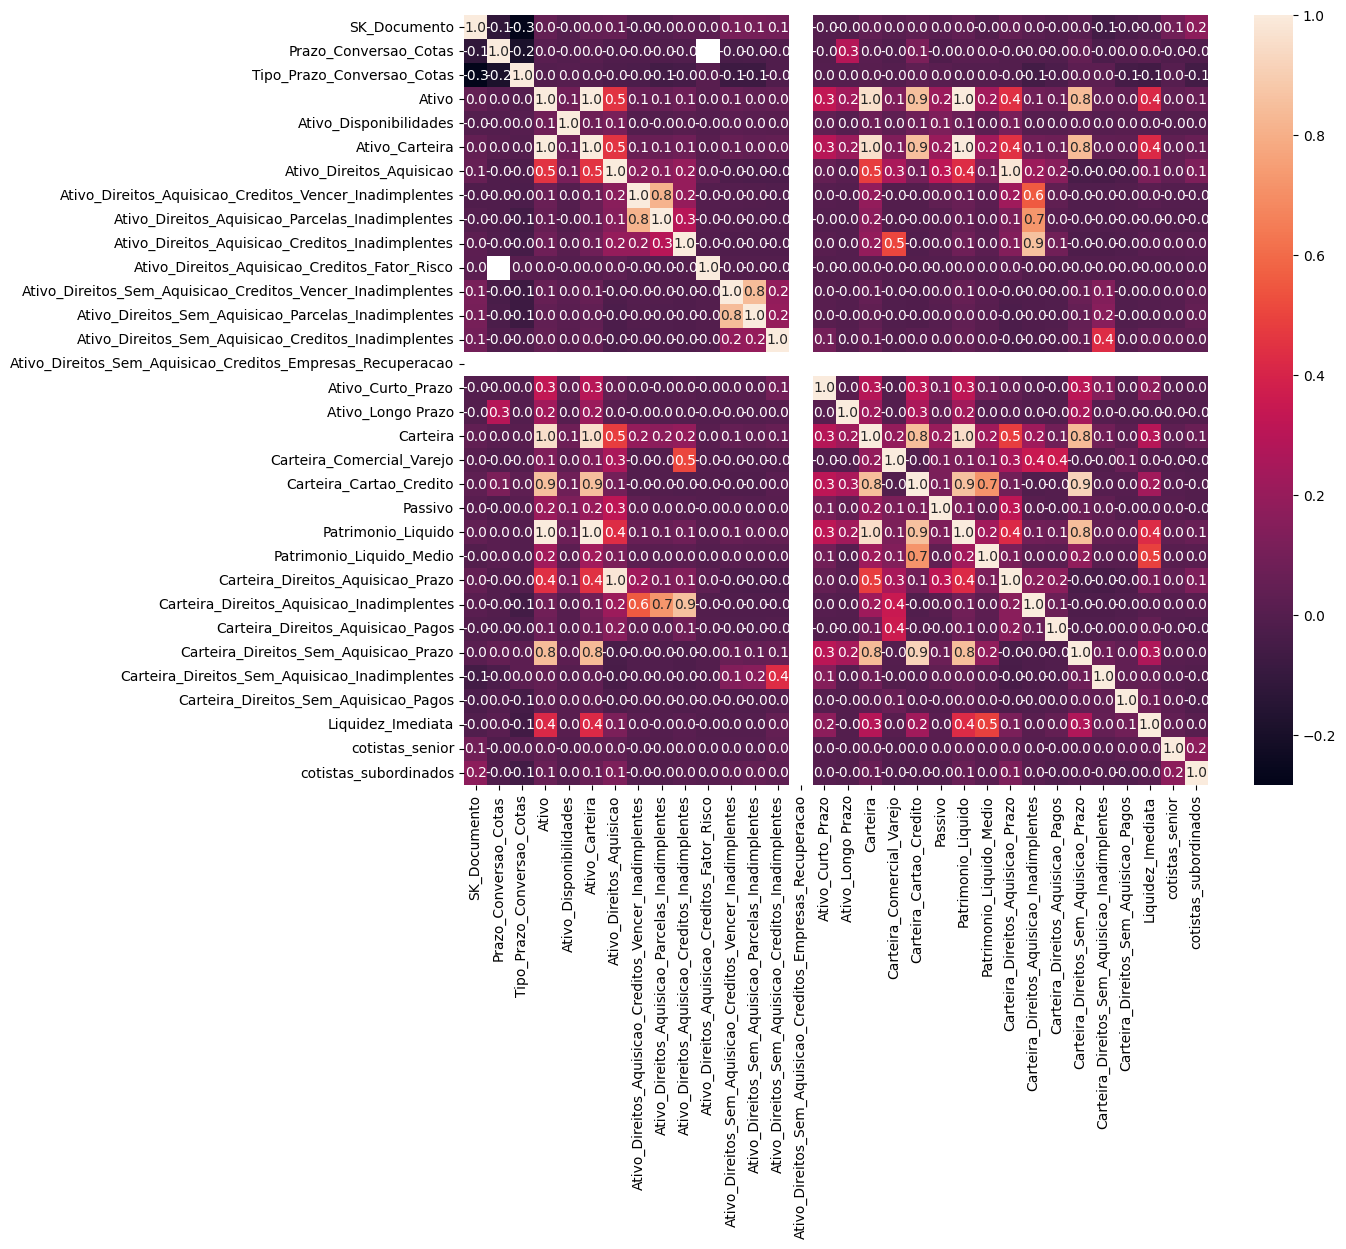

In [293]:
correlation_fidcs_info = df_report_relationship_fidcs_info.corr()
plt.figure(figsize=(12, 10)) 
sns.heatmap(correlation_fidcs_info, annot=True, fmt='.1f')
plt.show()

C:\Users\Inteli\AppData\Local\Temp\ipykernel_12480\3112836658.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_assignors_info = df_report_relationship_assignors_info.corr()


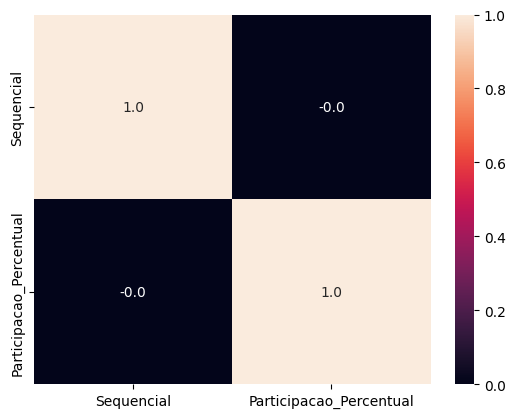

In [294]:
correlation_assignors_info = df_report_relationship_assignors_info.corr()
sns.heatmap(correlation_assignors_info, annot=True, fmt='.1f')
plt.show()

C:\Users\Inteli\AppData\Local\Temp\ipykernel_12480\3795468126.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_classes_info = df_report_relationship_classes_info.corr()


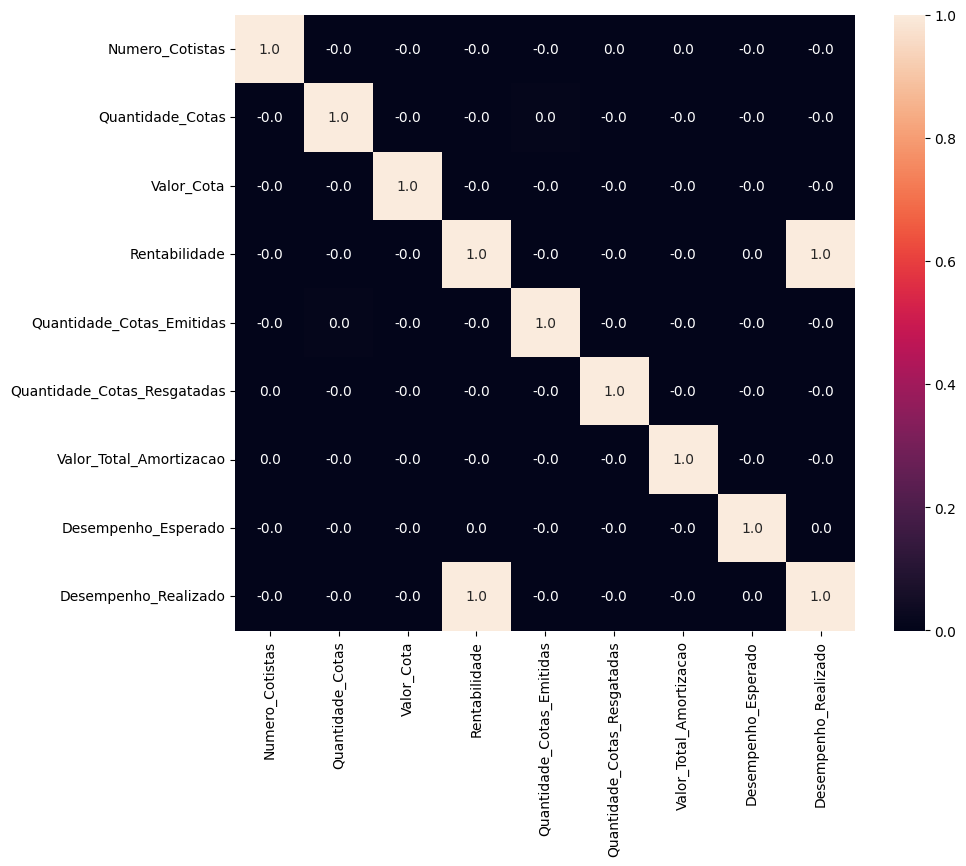

In [295]:
correlation_classes_info = df_report_relationship_classes_info.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_classes_info, annot=True, fmt='.1f')
plt.show()

### Tests

In [296]:
fidcs_info['VR_DC_Com_Riscos_E_Beneficios'] = fidcs_info['Ativo_Direitos_Aquisicao_Parcelas_Inadimplentes'] + fidcs_info ['Ativo_Direitos_Aquisicao_Creditos_Inadimplentes'] - fidcs_info['Carteira_Direitos_Aquisicao_Inadimplentes_1_30_Dias'] - fidcs_info['Ativo_Direitos_Aquisicao_Provisao_Reducao']
fidcs_info['VR_DC_Sem_Riscos_E_Beneficios'] = fidcs_info['Ativo_Direitos_Sem_Aquisicao_Parcelas_Inadimplentes'] + fidcs_info ['Ativo_Direitos_Sem_Aquisicao_Creditos_Inadimplentes'] - fidcs_info['Carteira_Direitos_Sem_Aquisicao_Inadimplentes_1_30_Dias'] - fidcs_info['Ativo_Direitos_Sem_Aquisicao_Provisao_Reducao']

In [297]:
## Group 3 - Verum Analysis 

fundos_problema = [
    'FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS INDIGO BARTER',
    'CREDIHOME FUNDO DE INVESTIMENTO EM DIREITOS CREDITORIOS',
    'FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS BRAVA CHALLENGE',
    'RUBI FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS MULTISETORIAL',
    'FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS BULLLA',
    'LS INTERBANK FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS',
    'TURQUESA - FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS',
]

columns_com_risco = ['Data_Entrega', 'VR_DC_Com_Riscos_E_Beneficios', 'Nome_Fundo']
columns_sem_risco = ['Data_Entrega', 'VR_DC_Sem_Riscos_E_Beneficios', 'Nome_Fundo']
filtro = fidcs_info['Nome_Fundo'].isin(fundos_problema)

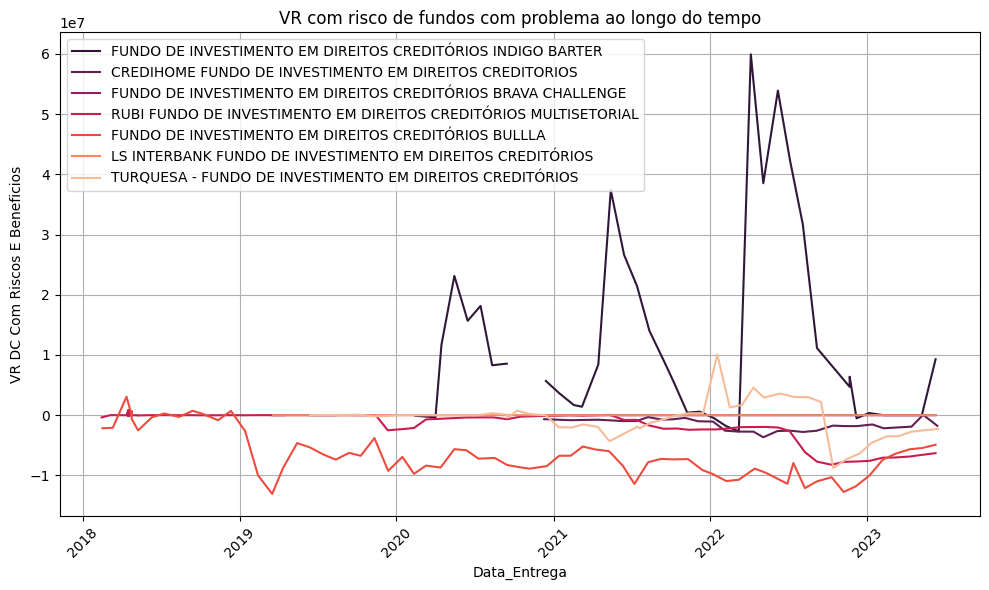

In [298]:
## Group 3 - Verum Analysis 

com_risco = fidcs_info.loc[filtro, columns_com_risco]

com_risco['Data_Entrega'] = pd.to_datetime(com_risco['Data_Entrega'])

com_risco = com_risco.sort_values(['Nome_Fundo', 'Data_Entrega'])

plt.figure(figsize=(10, 6))

colors = sns.color_palette("rocket", len(fundos_problema))
for i, nome_fundo in enumerate(fundos_problema):
    fundo_data = com_risco[com_risco['Nome_Fundo'] == nome_fundo]
    plt.plot(fundo_data['Data_Entrega'], fundo_data['VR_DC_Com_Riscos_E_Beneficios'], color=colors[i], label=nome_fundo)

plt.title('VR com risco de fundos com problema ao longo do tempo')
plt.xlabel('Data_Entrega')
plt.ylabel('VR DC Com Riscos E Beneficios')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()
